In [17]:
#Dependencies
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import gmaps
from api_key import apikey 
from api_key import g_key 
from pytrends.request import TrendReq

In [45]:
gmaps.configure(api_key=g_key)

In [2]:
#Set Search URL
search_url = f"https://developers.zomato.com/api/v2.1/search?entity_id=259&entity_type=city"

#Create Requests
print(requests.get(search_url, headers={"user-key" : apikey}))

#Get Data and Convert into JSON
data = requests.get(search_url, headers={"user-key" : apikey}).json()

#Display JSON Data
data

<Response [200]>


{'results_found': 17502,
 'results_start': 0,
 'results_shown': 20,
 'restaurants': [{'restaurant': {'R': {'has_menu_status': {'delivery': -1,
      'takeaway': -1},
     'res_id': 16577492,
     'is_grocery_store': False},
    'apikey': 'c4ae10a41c1f43f16338d7cc86e554cc',
    'id': '16577492',
    'name': 'Chin Chin',
    'url': 'https://www.zomato.com/melbourne/chin-chin-3-cbd?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1',
    'location': {'address': '125 Flinders Lane, CBD, Melbourne',
     'locality': 'CBD',
     'city': 'Melbourne',
     'city_id': 259,
     'latitude': '-37.8155645773',
     'longitude': '144.9703757465',
     'zipcode': '3000',
     'country_id': 14,
     'locality_verbose': 'CBD, Melbourne'},
    'switch_to_order_menu': 0,
    'cuisines': 'Thai, Asian Fusion',
    'timings': '11 AM to 11 PM (Mon-Thu, Sun), 11 AM to 11:30 PM (Fri-Sat)',
    'average_cost_for_two': 135,
    'price_range': 4,
    'currency': '$',
    'highlights': ['Dinner',
     'Cr

In [3]:
#Find Number of Restaurants
resto_num = data["results_found"]

#Print Number of Restaurants
print(f"The number of restaurants in Melbourne, Sydney and Perth is {resto_num}")

The number of restaurants in Melbourne, Sydney and Perth is 17502


In [4]:
#Set City IDs
cityid = [296,259,260]

#Create Empty Lists
rest_id_list = []
rest_name_list =[]
rest_cuis_list = []
rest_local_list = []
rest_city_list = []
rest_lat_list = []
rest_long_list = []
rest_rate_list = []
rest_delivery_list = []
rest_ratenum_list = []

resto_num = 20
loop_num = 0
show_page = 0

#Create For Loop
for citynum in cityid:
    search_url = f"https://developers.zomato.com/api/v2.1/search?entity_id={citynum}&entity_type=city&start={show_page}"
    data = requests.get(search_url, headers={"user-key" : apikey}).json()
    for page in range(5):
        for count in range(resto_num):
            try: 
                rest_id = data["restaurants"][count]["restaurant"]["id"]
                rest_name = data["restaurants"][count]["restaurant"]["name"]
                rest_cuis = data["restaurants"][count]["restaurant"]["cuisines"]
                rest_local = data["restaurants"][count]["restaurant"]["location"]["locality"]
                rest_city = data["restaurants"][count]["restaurant"]["location"]["city"]
                rest_lat = data["restaurants"][count]["restaurant"]["location"]["latitude"]
                rest_long = data["restaurants"][count]["restaurant"]["location"]["longitude"]
                rest_rate_num = data["restaurants"][count]["restaurant"]["all_reviews_count"]
                rest_rate = data["restaurants"][count]["restaurant"]["user_rating"]["aggregate_rating"]
                rest_delivery = data["restaurants"][count]["restaurant"]["highlights"]
                
                #Check if they Deliver 
                theydelivery = False
                for doesdelivery in rest_delivery:
                    if doesdelivery == 'Delivery':
                        theydelivery = True

                if theydelivery == True:
                    rest_delivery = "Yes"
                else:
                    rest_delivery = "No"

                #Append Results to List
                rest_id_list.append(rest_id)
                rest_name_list.append(rest_name)
                rest_cuis_list.append(rest_cuis)
                rest_local_list.append(rest_local)
                rest_city_list.append(rest_city)
                rest_lat_list.append(rest_lat)
                rest_long_list.append(rest_long)
                rest_rate_list.append(rest_rate)
                rest_ratenum_list.append(rest_rate_num)
                rest_delivery_list.append(rest_delivery)
                
                #Repeat
                if count == 19:
                    show_page = show_page + 20
                    search_url = f"https://developers.zomato.com/api/v2.1/search?entity_id={citynum}&entity_type=city&start={show_page}"
                    data = requests.get(search_url, headers={"user-key" : apikey}).json()
                    count = 0
            except:
                print("error")
    count = 0
    page = 0
    show_page = 0


#Check for Errors
try:            
    restaurants_df = pd.DataFrame({
        "Restaurant ID":rest_id_list,
        "Name":rest_name_list,
        "Cuisine":rest_cuis_list,
        "Locality":rest_local_list,
        "City":rest_city_list,
        "Latitude":rest_lat_list,
        "Longitude":rest_long_list,
        "Rating":rest_rate_list,
        "Total Number Ratings": rest_ratenum_list,
        "Delivery":rest_delivery_list
    })
except:
    print(len(rest_id_list))
    print(len(rest_name_list))
    print(len(rest_cuis_list))
    print(len(rest_local_list))
    print(len(rest_city_list))
    print(len(rest_lat_list))
    print(len(rest_long_list))
    print(len(rest_rate_list))
    print(len(rest_review_list))
    print(len(rest_delivery_list))
    
#Drop Duplicate Results    
restaurants_df = restaurants_df.drop_duplicates()

#Print DataFrame
restaurants_df

,Restaurant ID,Name,Cuisine,Locality,City,Latitude,Longitude,Rating,Total Number Ratings,Delivery
0,16600038,Bib & Tucker,"Modern Australian, Cafe Food",North Fremantle,Perth,-32.0284215000,115.7498293000,4.1,692,No
1,16597645,Mrs. S,"Patisserie, Cafe Food",Maylands,Perth,-31.9286800875,115.8919624239,4.5,643,No
2,18196379,tbsp.,"Sandwich, Coffee and Tea, Cafe Food",Bayswater,Perth,-31.9194560000,115.9096643000,4.7,335,No
3,16598431,Tuck Shop Cafe,"Modern Australian, Cafe Food",Northbridge,Perth,-31.9467356499,115.8621080965,4.8,799,No
4,16599082,Sayers Sister,"Modern Australian, Coffee and Tea",Perth CBD,Perth,-31.9404785312,115.8615736663,4.6,496,No
...,...,...,...,...,...,...,...,...,...,...
295,18518832,The Grounds of the City,"Cafe Food, Coffee and Tea",CBD,Sydney,-33.8721590260,151.2070344016,4.2,243,No
296,16558672,Pancakes On The Rocks,"Grill, Desserts, Pizza, Cafe Food, Coffee and Tea",The Rocks,Sydney,-33.8586584831,151.2084479257,4.1,324,No
297,17744545,Gogyo,"Japanese, Ramen",Surry Hills,Sydney,-33.8823602716,151.2101410702,4.5,120,No
298,16559582,Spice Temple,"Chinese, Fusion, Yum Cha",CBD,Sydney,-33.8661222694,151.2100026011,4.3,244,No


In [9]:
#Save DataFrame to csv 
restaurants_df.to_csv("Multi_City_Data.csv", encoding="utf-8", index=False)

In [6]:
#Number of Restaurants that Deliver
restaurants_df["Delivery"].value_counts()

No     273
Yes     27
Name: Delivery, dtype: int64

In [30]:
#Sort DataFrame by Rating
restaurants_df = restaurants_df.sort_values(by=["Rating"],ascending=False)

#Print DataFrame
reshaped = \
(restaurants_df.set_index(restaurants_df.columns.drop('Cuisine',1).tolist())
   .Cuisine.str.split(', ', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'Cuisine'})
   .loc[:, restaurants_df.columns]
)

reshaped_df = pd.DataFrame(reshaped)
reshaped_df

,Restaurant ID,Name,Cuisine,Locality,City,Latitude,Longitude,Rating,Total Number Ratings,Delivery
0,16583248,Pidapipó,Ice Cream,Carlton,Melbourne,-37.7983310261,144.9671862647,4.9,525,No
1,16583248,Pidapipó,Desserts,Carlton,Melbourne,-37.7983310261,144.9671862647,4.9,525,No
2,18097646,Agathé Pâtisserie,Bakery,"South Melbourne Market, South Melbourne",Melbourne,-37.8325827938,144.9569066986,4.9,319,No
3,18097646,Agathé Pâtisserie,Patisserie,"South Melbourne Market, South Melbourne",Melbourne,-37.8325827938,144.9569066986,4.9,319,No
4,16598837,Run Amuk,Fast Food,"Orient Street, South Fremantle",Perth,-32.0722768677,115.7530652359,4.9,341,No
...,...,...,...,...,...,...,...,...,...,...
647,16599918,Jamie's Italian,Italian,Perth CBD,Perth,-31.9517195884,115.8580579609,3.8,1473,No
648,16598361,The Wild Fig Cafe,Modern Australian,Scarborough,Perth,-31.8979994965,115.7571093366,3.3,709,No
649,16598361,The Wild Fig Cafe,Cafe Food,Scarborough,Perth,-31.8979994965,115.7571093366,3.3,709,No
650,16601603,Lucky Chan's Laundry + Noodlebar,Asian,Northbridge,Perth,-31.9465239852,115.8608149365,2.9,389,No


In [31]:
#Count Number of Cuisines
top_cuisines = reshaped_df["Cuisine"].value_counts()

#Get Top 10
top_10_cuisines = top_cuisines.iloc[[0,1,2,3,4,5,6,7,8,9]]

#Print Results
top_cuisines

Cafe Food            93
Coffee and Tea       84
Japanese             61
Modern Australian    51
Desserts             24
                     ..
Tea                   1
Hawaiian              1
Vegan                 1
Israeli               1
Irish                 1
Name: Cuisine, Length: 64, dtype: int64

<AxesSubplot:>

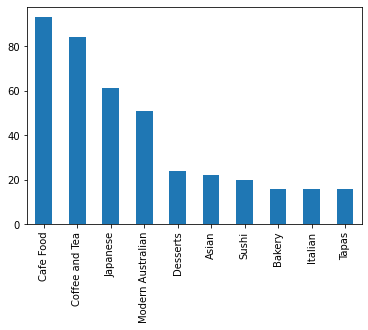

In [32]:
#Plot as Bar Graph
top_10_cuisines.plot(kind='bar')

In [34]:
#Get Top Restaurants by City
perth_top = reshaped_df.loc[reshaped_df["City"]=="Perth"]

#Print DataFrame
perth_top.head(10)

,Restaurant ID,Name,Cuisine,Locality,City,Latitude,Longitude,Rating,Total Number Ratings,Delivery
4,16598837,Run Amuk,Fast Food,"Orient Street, South Fremantle",Perth,-32.0722768677,115.7530652359,4.9,341,No
7,16597513,Pacific Rim Mix Plate,Hawaiian,Applecross,Perth,-32.0219001116,115.8322872967,4.9,213,No
8,16597513,Pacific Rim Mix Plate,Japanese,Applecross,Perth,-32.0219001116,115.8322872967,4.9,213,No
32,16598976,Marumo,Japanese,Nedlands,Perth,-31.9802157847,115.7966588438,4.9,141,No
33,16598976,Marumo,Seafood,Nedlands,Perth,-31.9802157847,115.7966588438,4.9,141,No
34,16598976,Marumo,Modern Australian,Nedlands,Perth,-31.9802157847,115.7966588438,4.9,141,No
47,16598431,Tuck Shop Cafe,Modern Australian,Northbridge,Perth,-31.9467356499,115.8621080965,4.8,799,No
48,16598431,Tuck Shop Cafe,Cafe Food,Northbridge,Perth,-31.9467356499,115.8621080965,4.8,799,No
73,16596036,Ha-Lu,Japanese,"Oxford Street, Leederville",Perth,-31.9233773227,115.8411462978,4.8,243,No
74,16596036,Ha-Lu,Tapas,"Oxford Street, Leederville",Perth,-31.9233773227,115.8411462978,4.8,243,No


<AxesSubplot:>

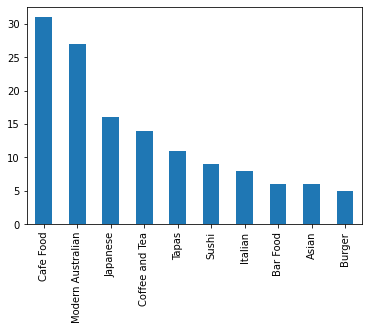

In [44]:
top_P_cuisines = perth_top["Cuisine"].value_counts()

#Get Top 10
top_10_P_cuisines = top_P_cuisines.iloc[[0,1,2,3,4,5,6,7,8,9]]

#Print Results
top_P_cuisines


top_10_P_cuisines.plot(kind='bar')

In [35]:
#Get Top Restaurants by City
melbourne_top = reshaped_df.loc[reshaped_df["City"]=="Melbourne"]

#Print DataFrame
melbourne_top.head(10)

,Restaurant ID,Name,Cuisine,Locality,City,Latitude,Longitude,Rating,Total Number Ratings,Delivery
0,16583248,Pidapipó,Ice Cream,Carlton,Melbourne,-37.7983310261,144.9671862647,4.9,525,No
1,16583248,Pidapipó,Desserts,Carlton,Melbourne,-37.7983310261,144.9671862647,4.9,525,No
2,18097646,Agathé Pâtisserie,Bakery,"South Melbourne Market, South Melbourne",Melbourne,-37.8325827938,144.9569066986,4.9,319,No
3,18097646,Agathé Pâtisserie,Patisserie,"South Melbourne Market, South Melbourne",Melbourne,-37.8325827938,144.9569066986,4.9,319,No
5,16582263,Gelato Messina,Ice Cream,Fitzroy,Melbourne,-37.8018912821,144.9836744741,4.9,835,No
6,16582263,Gelato Messina,Desserts,Fitzroy,Melbourne,-37.8018912821,144.9836744741,4.9,835,No
9,16573759,Le Petit Gateau,French,CBD,Melbourne,-37.8163464526,144.9596324936,4.9,350,No
10,16573759,Le Petit Gateau,Desserts,CBD,Melbourne,-37.8163464526,144.9596324936,4.9,350,No
11,16573759,Le Petit Gateau,Coffee and Tea,CBD,Melbourne,-37.8163464526,144.9596324936,4.9,350,No
17,16572612,Vue de monde,Australian,CBD,Melbourne,-37.8189544974,144.9579336494,4.9,986,No


<AxesSubplot:>

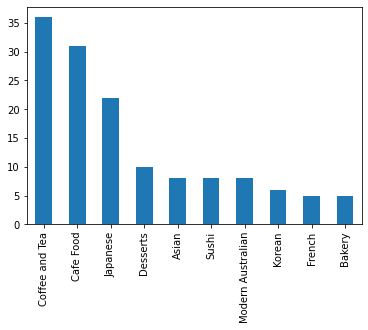

In [42]:
top_M_cuisines = melbourne_top["Cuisine"].value_counts()

#Get Top 10
top_10_M_cuisines = top_M_cuisines.iloc[[0,1,2,3,4,5,6,7,8,9]]

#Print Results
top_M_cuisines


top_10_M_cuisines.plot(kind='bar')

In [36]:
#Get Top Restaurants by City
sydney_top = reshaped_df.loc[reshaped_df["City"]=="Sydney"]

#Print DataFrame
sydney_top.head(10)

,Restaurant ID,Name,Cuisine,Locality,City,Latitude,Longitude,Rating,Total Number Ratings,Delivery
12,16566535,Lorraine's Patisserie,Desserts,"Ivy, CBD",Sydney,-33.8666116843,151.2077032775,4.9,111,No
13,16566535,Lorraine's Patisserie,Bakery,"Ivy, CBD",Sydney,-33.8666116843,151.2077032775,4.9,111,No
14,16568476,La Mamma del Gelato Anita,Ice Cream,"Central Park, Chippendale",Sydney,-33.8850718252,151.2004720420,4.9,231,No
15,15545439,Manpuku - Chatswood,Japanese,Chatswood,Sydney,-33.7943935138,151.1895571277,4.9,196,No
16,15545439,Manpuku - Chatswood,Ramen,Chatswood,Sydney,-33.7943935138,151.1895571277,4.9,196,No
21,16569454,LuMi Bar & Dining,Italian,Pyrmont,Sydney,-33.8669045524,151.1973965541,4.9,197,No
22,16569454,LuMi Bar & Dining,Japanese,Pyrmont,Sydney,-33.8669045524,151.1973965541,4.9,197,No
23,16562433,Cow & The Moon,Ice Cream,Enmore,Sydney,-33.8990000921,151.1720285565,4.9,356,No
24,16562433,Cow & The Moon,Desserts,Enmore,Sydney,-33.8990000921,151.1720285565,4.9,356,No
25,16562433,Cow & The Moon,Coffee and Tea,Enmore,Sydney,-33.8990000921,151.1720285565,4.9,356,No


<AxesSubplot:>

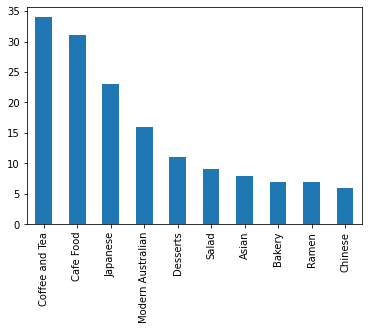

In [43]:
top_S_cuisines = sydney_top["Cuisine"].value_counts()

#Get Top 10
top_10_S_cuisines = top_S_cuisines.iloc[[0,1,2,3,4,5,6,7,8,9]]

#Print Results
top_S_cuisines


top_10_S_cuisines.plot(kind='bar')

In [65]:
locations = melbourne_top[["Latitude", "Longitude"]].astype(float)
rating = melbourne_top["Rating"].astype(float)

figure = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=rating,
                                 dissipating=True, max_intensity=50, point_radius=20)
figure.add_layer(heat_layer)

figure

Figure(layout=FigureLayout(height='420px'))

In [62]:
info_box_template = """
<dl>
<dt>Name</dt><dd>{Restaurant}</dd>
<dt>Rating</dt><dd>{rating}</dd>

</dl>
"""

Name_info = [info_box_template.format(**row) for index, row in melbourne_top.iterrows()]
locations = melbourne_top[["Lat", "Lon"]]

markers = gmaps.marker_layer(locations, info_box_content=Name_info)

KeyError: 'Restaurant'